## Measuring the latent representations: activations of the message functions

In [45]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from model import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

In [46]:
#load the data
data = load_data('../simulations/datasets/r1_n=3_dim=2_nt=1000_dt=0.005')
X, y = data

#make train, test, val sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, shuffle=False)

train the model

In [47]:
cutoff = 10000
val_cutoff = 2500

#train the model on a small amount of data
model = train((X_train[:cutoff], y_train[:cutoff]), (X_val[:cutoff], y_val[:cutoff]), 25)

Epoch: 1/25: 100%|██████████| 313/313 [00:02<00:00, 124.26it/s]


training loss: 0.9895, val loss: 1.6207


Epoch: 2/25: 100%|██████████| 313/313 [00:01<00:00, 204.11it/s]


training loss: 0.7332, val loss: 1.4217


Epoch: 3/25: 100%|██████████| 313/313 [00:01<00:00, 176.78it/s]


training loss: 0.5988, val loss: 1.2005


Epoch: 4/25: 100%|██████████| 313/313 [00:02<00:00, 148.23it/s]


training loss: 0.4662, val loss: 1.0629


Epoch: 5/25: 100%|██████████| 313/313 [00:02<00:00, 152.84it/s]


training loss: 0.4453, val loss: 1.0125


Epoch: 6/25: 100%|██████████| 313/313 [00:02<00:00, 131.65it/s]


training loss: 0.3608, val loss: 0.8514


Epoch: 7/25: 100%|██████████| 313/313 [00:03<00:00, 81.50it/s] 


training loss: 0.3230, val loss: 0.8385


Epoch: 8/25: 100%|██████████| 313/313 [00:03<00:00, 100.04it/s]


training loss: 0.3334, val loss: 0.7555


Epoch: 9/25: 100%|██████████| 313/313 [00:02<00:00, 106.43it/s]


training loss: 0.2873, val loss: 0.6789


Epoch: 10/25: 100%|██████████| 313/313 [00:02<00:00, 125.60it/s]


training loss: 0.2542, val loss: 0.7638


Epoch: 11/25: 100%|██████████| 313/313 [00:02<00:00, 116.44it/s]


training loss: 0.2610, val loss: 0.7272


Epoch: 12/25: 100%|██████████| 313/313 [00:02<00:00, 127.49it/s]


training loss: 0.2483, val loss: 0.6716


Epoch: 13/25: 100%|██████████| 313/313 [00:02<00:00, 143.09it/s]


training loss: 0.2402, val loss: 0.8347


Epoch: 14/25: 100%|██████████| 313/313 [00:02<00:00, 154.32it/s]


training loss: 0.2399, val loss: 0.6345


Epoch: 15/25: 100%|██████████| 313/313 [00:02<00:00, 134.08it/s]


training loss: 0.2510, val loss: 0.8689


Epoch: 16/25: 100%|██████████| 313/313 [00:02<00:00, 151.72it/s]


training loss: 0.2456, val loss: 0.6652


Epoch: 17/25: 100%|██████████| 313/313 [00:02<00:00, 139.94it/s]


training loss: 0.2365, val loss: 0.5629


Epoch: 18/25: 100%|██████████| 313/313 [00:02<00:00, 112.16it/s]


training loss: 0.2021, val loss: 0.6641


Epoch: 19/25: 100%|██████████| 313/313 [00:02<00:00, 140.77it/s]


training loss: 0.2127, val loss: 0.5739


Epoch: 20/25: 100%|██████████| 313/313 [00:02<00:00, 122.09it/s]


training loss: 0.2016, val loss: 0.6459


Epoch: 21/25: 100%|██████████| 313/313 [00:03<00:00, 85.85it/s] 


training loss: 0.2020, val loss: 0.9208


Epoch: 22/25: 100%|██████████| 313/313 [00:03<00:00, 97.43it/s] 


training loss: 0.2099, val loss: 0.7015


Epoch: 23/25: 100%|██████████| 313/313 [00:07<00:00, 43.02it/s]


training loss: 0.2012, val loss: 0.6841


Epoch: 24/25: 100%|██████████| 313/313 [00:02<00:00, 106.10it/s]


training loss: 0.1931, val loss: 0.5807


Epoch: 25/25: 100%|██████████| 313/313 [00:03<00:00, 78.34it/s]


training loss: 0.2214, val loss: 0.5969


In [60]:
TensorDataset(X_test)

In [92]:
dataloader = DataLoader(TensorDataset(X_test[:1]), batch_size=1, shuffle=False)
edge_index = get_edge_index(X_test.shape[1])
#print(edge_index)
tmp = 0
for (nodes,) in dataloader:
    s1 = nodes[:, edge_index[0]]
    #print(s1)
    s2 = nodes[:, edge_index[1]]
    edge_features = torch.cat((s1, s2), dim=-1)
    messages = model.edge_model(edge_features)
    print(messages.shape)
    batch_messages = torch.cat((s1, s2, messages), dim=-1)
    print(batch_messages.shape)
    

torch.Size([1, 6, 100])
torch.Size([1, 6, 112])


get the message features along with other information from the trained model and test data

In [ ]:
def get_message_features(model, input_data, batch_size=32):
    """
    Make pd.Dataframe of messages and particle information
    
    Args:
        model (NBodyGNN): Trained model
        input_data (torch.Tensor): Input data with shape [no_timesteps, no_nodes, node_features]
        batch_size (int): Size of batches to process
        
    Returns:
        pd.DataFrame: DataFrame containing node features and message features
        numpy.ndarray: just the message features
    """

    model.eval()  
    edge_index = get_edge_index(input_data.shape[1])
    
    # Create dataloader
    dataset = TensorDataset(input_data)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    
    all_message_info = []
    
    with torch.no_grad():
        for (nodes,) in dataloader:
            x_i = nodes[:, edge_index[0]]  # Source nodes
            x_j = nodes[:, edge_index[1]]  # Target nodes
            
            x = torch.cat((x_i, x_j), dim=-1)
            messages = model.edge_model(x) #put thru edge model
            #messages shape is [batch_size, num_edges, 100]
            
            #combine node features with messages along final axis
            message_info = torch.cat((x_i, x_j, messages), dim=-1)
            
            #reshape batch_messages to be 2D for pandas: [batch_size * num_edges, features]
            #batch info and edge info doesnt matter. only related feature info and latent messages
            message_info = message_info.reshape(-1, message_info.shape[-1])
            all_message_info.append(message_info)
    
    # Combine all batches
    message_info = torch.cat(all_message_info, dim=0)
    
    # Convert to numpy for DataFrame creation
    message_info = message_info.numpy()
    
    # Create column names
    node_info = ['x', 'y', 'delta_x', 'delta_y', 'q', 'm'] #for 2d
    source_cols = [f'{f}1' for f in node_info]
    target_cols = [f'{f}2' for f in node_info]
    message_cols = [f'e{i}' for i in range(messages.shape[-1])]
    columns = source_cols + target_cols + message_cols
    
    # Create DataFrame
    message_info = pd.DataFrame(message_info, columns=columns)
    
    # distances between particles
    message_info['x_dist'] = message_info.x1 - message_info.x2
    message_info['y_dist'] = message_info.y1 - message_info.y2
    message_info['r'] = np.sqrt(message_info.x_dist**2 + message_info.y_dist**2)
    
    # Calculate relative velocities
    message_info['dvx'] = message_info.delta_x1 - message_info.delta_x2
    message_info['dvy'] = message_info.delta_y1 - message_info.delta_y2
    message_info['v_rel'] = np.sqrt(message_info.dvx**2 + message_info.dvy**2)

    message_cols = [col for col in message_info.columns if col.startswith('e')]
    message_features = message_info[message_cols].values #shape is [batch_size * num edges, 100]
    
    return message_info, message_features

standard message model (100 outputs). plot the message 

In [ ]:
def get_important_features(message_features):
    """get most important (top 2) features (standard) by measuring variance over all data

    Args:
        message_features (numpy.ndarray): just the message features. of shape [datapoints, 100]

    Returns:
        numpy.ndarray: most important two messages. of shape [datapoints, 2]
    """
    std = message_features.std(axis = 0)
    important_elements = np.argsort(std)[-2:]
    return message_features[:, important_elements]

In [151]:
def get_force(message_info, sim = 'r1'):
    """
    get forces for the different simulations
    """
    x_dist = message_info['x_dist']
    y_dist = message_info['y_dist']
    r = message_info['r']
    m1m2 = message_info['m1'] * message_info['m2']
    eps = 1e-6
    if sim == 'r1':
        f = - m1m2 / (r*r + eps)
        f_x = f * x_dist / (r+eps)
        f_y = f * y_dist / (r+eps)
    return np.array(f), np.array(f_x), np.array(f_y)


In [148]:
message_info, message_features = get_message_features(model, X_test[:500])

In [154]:
best_messages = get_important_features(message_features)
best_messages[:,0]

array([-0.31076977,  0.07470071,  0.48924243, ...,  0.01857658,
       -0.21838216,  0.09162303], shape=(3000,), dtype=float32)

In [149]:
_, fx, fy = get_force(message_info)

fit linear combination of forces to messsage components-linear regression tings

In [159]:
from sklearn.linear_model import LinearRegression

def fit_coefficients(message_elem, fx, fy):
    """
    Fit coefficients for linear combination of forces
    Returns a, b coefficients for a*fx + b*fy
    """
    X = np.column_stack([fx, fy])
    lin_reg = LinearRegression()
    lin_reg.fit(X, message_elem)
    return lin_reg.coef_[0], lin_reg.coef_[1]

In [161]:
a,b = fit_coefficients(best_messages[:,0], fx, fy)
c,d = fit_coefficients(best_messages[:,1], fx, fy)

In [167]:
import matplotlib.pyplot as plt

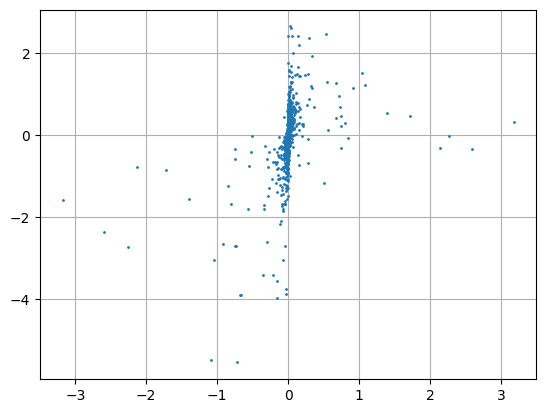

In [173]:
lin_combo1 = a*fx +b*fy
plt.plot(lin_combo1, best_messages[:,0], 'o', markersize = '1')
plt.grid()